In [20]:

import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.image import imread
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation , Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tqdm
import shutil

In [21]:
filenames = os.listdir("./data/raw/train")
categories = []
names = []

for filename in filenames:
    category = filename.split('.')[0]
    names.append(filename)
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)


df = pd.DataFrame({
                     'filename':names,
                     'category': categories
    })

In [22]:
df.head()

,filename,category
0,cat.9388.jpg,0
1,cat.2683.jpg,0
2,cat.7252.jpg,0
3,dog.3446.jpg,1
4,dog.2177.jpg,1


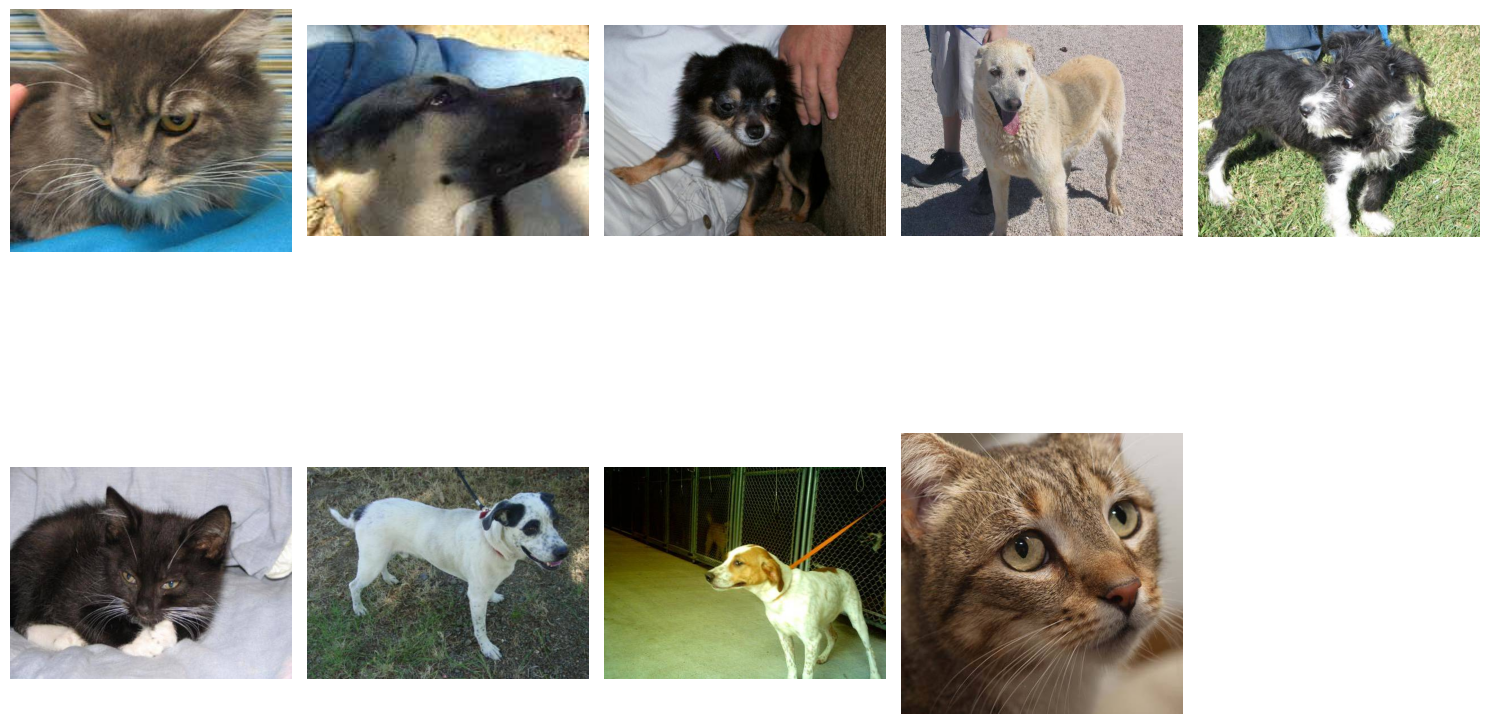

In [23]:
from tensorflow.keras.preprocessing.image import load_img
import random

plt.figure(figsize=(15,10))
for i in range(9):
    sample = random.choice(filenames)
    image = load_img("./data/raw/train/"+sample)
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.axis('off')
    

plt.tight_layout()
plt.show()


<Axes: xlabel='category'>

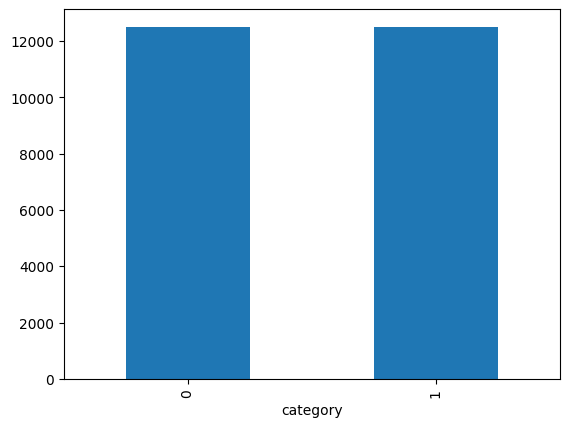

In [24]:
df["category"].value_counts().plot.bar()

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()



/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-13 19:09:51.174969: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-13 19:09:51.300824: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138674176 exceeds 10% of free system memory.
2025-02-13 19:09:51.512837: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138674176 exceeds 10% of free system memory.
2025-02-13 19:09:51.566765: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138674176 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,669,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,766,274 (132.62 MB)

 Trainable params: 34,764,802 (132.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
earlystop = EarlyStopping(patience=10)

In [28]:
earlystop

In [29]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [30]:
learning_rate_reduction

In [31]:
callbacks = [earlystop, learning_rate_reduction]

In [32]:
callbacks

In [33]:
df["category"] = df["category"].replace({0:'cat', 1:'dog'})

In [34]:
df

,filename,category
0,cat.9388.jpg,cat
1,cat.2683.jpg,cat
2,cat.7252.jpg,cat
3,dog.3446.jpg,dog
4,dog.2177.jpg,dog
...,...,...
24995,dog.805.jpg,dog
24996,dog.3595.jpg,dog
24997,cat.2932.jpg,cat
24998,cat.1265.jpg,cat


In [35]:
train_data, validate_data = train_test_split(df, test_size = 0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True) 

In [36]:
train_data

,filename,category
0,cat.10071.jpg,cat
1,dog.3900.jpg,dog
2,dog.2252.jpg,dog
3,dog.6700.jpg,dog
4,dog.10749.jpg,dog
...,...,...
19995,dog.4849.jpg,dog
19996,cat.9566.jpg,cat
19997,dog.2640.jpg,dog
19998,dog.6421.jpg,dog


<Axes: xlabel='category'>

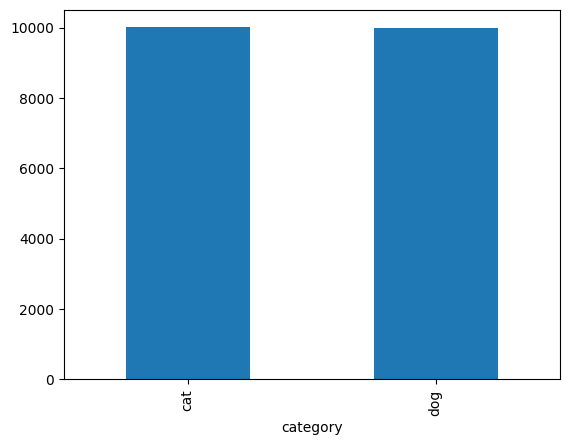

In [37]:
train_data["category"].value_counts().plot.bar()

<Axes: xlabel='category'>

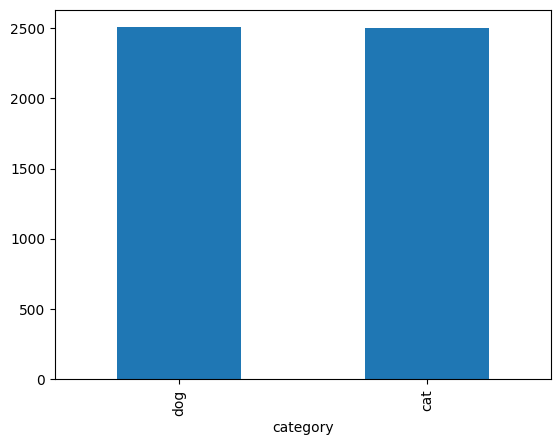

In [38]:
validate_data["category"].value_counts().plot.bar() 

In [39]:
total_train = train_data.shape[0]

total_validate = validate_data.shape[0]

batch_size=15

In [40]:
total_train

20000

In [41]:
total_validate

5000

In [42]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_data, 
    "./data/raw/train/", 
    x_col='filename',
    y_col='category',
    target_size=(200,200),
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [43]:
train_datagen

In [44]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_data, 
    "./data/raw/train/", 
    x_col='filename',
    y_col='category',
    target_size=(200,200),
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [45]:
example_df = train_data.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./data/raw/train/", 
    x_col='filename',
    y_col='category',
    target_size=(200,200),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [46]:
example_df

,filename,category
0,cat.9243.jpg,cat


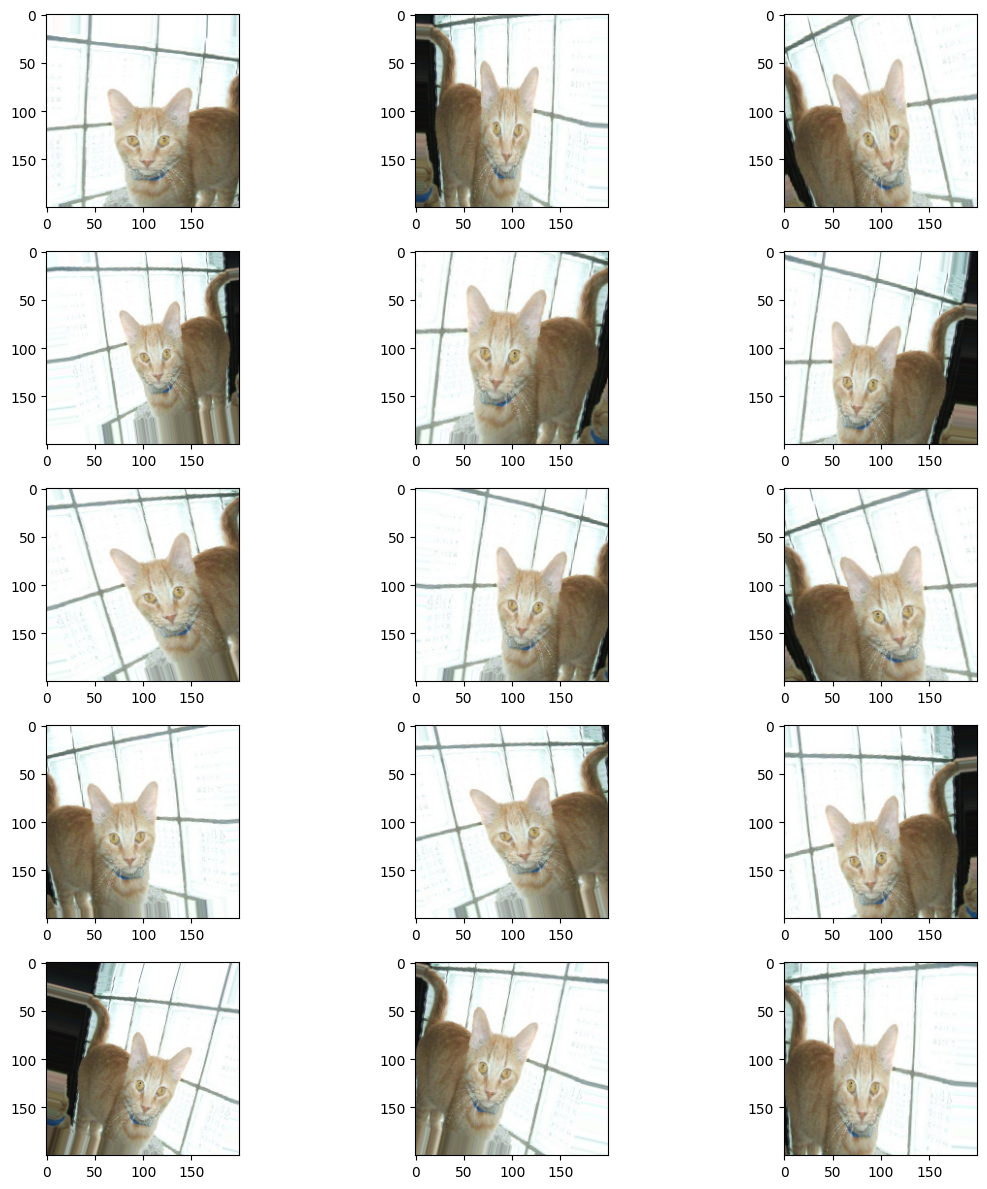

: 

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if False else 10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-02-13 19:09:55.670884: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138674176 exceeds 10% of free system memory.
2025-02-13 19:09:56.702359: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138674176 exceeds 10% of free system memory.


 621/1333 ━━━━━━━━━━━━━━━━━━━━ 16:50 1s/step - accuracy: 0.5619 - loss: 1.1566

In [ ]:
model.save_weights("model.h5")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("./data/raw/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./data/raw/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./data/raw/test"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()